# Project:Advanced Fraud Detection System: Leveraging Machine Learning to Combat Financial Fraud
### 1)EDA & Preproc
### 2)Modelling and Evaluation metrics
### 3)Best Model

## 1) EDA & PreProc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,roc_auc_score,classification_report


### import and understand the data

In [2]:
filepath= '/Users/peekaboo645/Desktop/cv/optimized cv/kaggle/credit_card_transactions.csv'
df = pd.read_csv(filepath)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [3]:
df.shape

(1296675, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [6]:
#find missing values
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [7]:
#Using label encoding to handle the categorical variables
col_enc=df.select_dtypes(include='object').columns
col_enc

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [8]:
len(col_enc)

12

In [9]:
Label_Encoders = {}
for column in ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job']:
    le = LabelEncoder()
    df[column]= le.fit_transform(df[column])
    Label_Encoders[column]= le
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,162,18,0,568,...,-81.1781,3495,370,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,309,157,0,435,...,-118.2105,149,428,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,115,381,1,602,...,-112.2620,4154,307,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,163,463,1,930,...,-112.1138,1939,328,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,336,149,1,418,...,-79.4629,99,116,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [10]:
len(df.select_dtypes(include= 'object').columns)

3

### now we have three datetime columns that need to be separately handled i.e, dob, trans_date_trans_time,trans_num.

In [11]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_yr']= pd.to_datetime(df['trans_date_trans_time']).dt.year
df['trans_month']= pd.to_datetime(df['trans_date_trans_time']).dt.month
df['trans_day'] = pd.to_datetime(df['trans_date_trans_time']).dt.day
df['trans_hour']= pd.to_datetime(df['trans_date_trans_time']).dt.hour
df['trans_min']= pd.to_datetime(df['trans_date_trans_time']).dt.minute
df['trans_sec'] = pd.to_datetime(df['trans_date_trans_time']).dt.second
df


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_lat,merch_long,is_fraud,merch_zipcode,trans_yr,trans_month,trans_day,trans_hour,trans_min,trans_sec
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,162,18,0,568,...,36.011293,-82.048315,0,28705.0,2019,1,1,0,0,18
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,309,157,0,435,...,49.159047,-118.186462,0,NaN,2019,1,1,0,0,44
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,115,381,1,602,...,43.150704,-112.154481,0,83236.0,2019,1,1,0,0,51
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,163,463,1,930,...,47.034331,-112.561071,0,NaN,2019,1,1,0,1,16
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,336,149,1,418,...,38.674999,-78.632459,0,22844.0,2019,1,1,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,499,0,15.56,121,332,1,154,...,36.841266,-111.690765,0,NaN,2020,6,21,12,12,8
1296671,1296671,2020-06-21 12:12:19,6011149206456997,2,1,51.70,160,463,1,856,...,38.906881,-78.246528,0,22630.0,2020,6,21,12,12,19
1296672,1296672,2020-06-21 12:12:32,3514865930894695,599,1,105.93,74,67,1,158,...,33.619513,-105.130529,0,88351.0,2020,6,21,12,12,32
1296673,1296673,2020-06-21 12:13:36,2720012583106919,509,1,74.90,179,304,1,433,...,42.788940,-103.241160,0,69367.0,2020,6,21,12,13,36


In [12]:
#age from dob
df['dob']= pd.to_datetime(df['dob'])

df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,merch_zipcode,trans_yr,trans_month,trans_day,trans_hour,trans_min,trans_sec,age
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,162,18,0,568,...,-82.048315,0,28705.0,2019,1,1,0,0,18,31
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,309,157,0,435,...,-118.186462,0,NaN,2019,1,1,0,0,44,41
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,115,381,1,602,...,-112.154481,0,83236.0,2019,1,1,0,0,51,57
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,163,463,1,930,...,-112.561071,0,NaN,2019,1,1,0,1,16,52
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,336,149,1,418,...,-78.632459,0,22844.0,2019,1,1,0,3,6,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,499,0,15.56,121,332,1,154,...,-111.690765,0,NaN,2020,6,21,12,12,8,59
1296671,1296671,2020-06-21 12:12:19,6011149206456997,2,1,51.70,160,463,1,856,...,-78.246528,0,22630.0,2020,6,21,12,12,19,41
1296672,1296672,2020-06-21 12:12:32,3514865930894695,599,1,105.93,74,67,1,158,...,-105.130529,0,88351.0,2020,6,21,12,12,32,53
1296673,1296673,2020-06-21 12:13:36,2720012583106919,509,1,74.90,179,304,1,433,...,-103.241160,0,69367.0,2020,6,21,12,13,36,40


In [14]:
len(df.select_dtypes(include='object').columns)

1

In [18]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'trans_yr',
       'trans_month', 'trans_day', 'trans_hour', 'trans_min', 'trans_sec',
       'age'],
      dtype='object')

In [21]:
#drop the unnecessary columns:
df=df.drop(columns=['Unnamed: 0','trans_date_trans_time','dob','trans_num'])
df

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_long,is_fraud,merch_zipcode,trans_yr,trans_month,trans_day,trans_hour,trans_min,trans_sec,age
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,...,-82.048315,0,28705.0,2019,1,1,0,0,18,31
1,630423337322,241,4,107.23,309,157,0,435,612,47,...,-118.186462,0,NaN,2019,1,1,0,0,44,41
2,38859492057661,390,0,220.11,115,381,1,602,468,13,...,-112.154481,0,83236.0,2019,1,1,0,0,51,57
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,...,-112.561071,0,NaN,2019,1,1,0,1,16,52
4,375534208663984,297,9,41.96,336,149,1,418,216,45,...,-78.632459,0,22844.0,2019,1,1,0,3,6,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,499,0,15.56,121,332,1,154,330,44,...,-111.690765,0,NaN,2020,6,21,12,12,8,59
1296671,6011149206456997,2,1,51.70,160,463,1,856,813,20,...,-78.246528,0,22630.0,2020,6,21,12,12,19,41
1296672,3514865930894695,599,1,105.93,74,67,1,158,346,32,...,-105.130529,0,88351.0,2020,6,21,12,12,32,53
1296673,2720012583106919,509,1,74.90,179,304,1,433,471,41,...,-103.241160,0,69367.0,2020,6,21,12,13,36,40


### Understanding the data

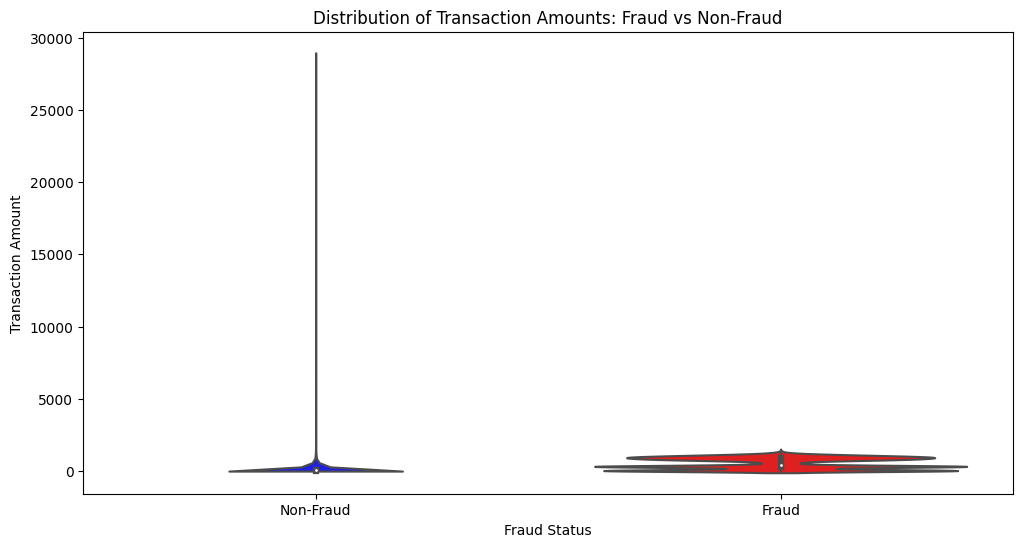

In [48]:
plt.figure(figsize=(12, 6))
# Create a violin plot with Seaborn
sns.violinplot(x='is_fraud', y='amt', data=df, palette={0: 'blue', 1: 'red'}, split=True)
plt.title('Distribution of Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])

plt.show()

Non-Fraud (Blue): The violin for non-fraudulent transactions is extremely narrow with a peak close to zero. This suggests that the majority of non-fraudulent transactions involve very low amounts, indicative of typical, regular spending behavior. The long upper tail indicates that while most transactions are low value, there are still some higher amount non-fraudulent transactions, albeit they are rare.

Fraud (Red): The distribution of fraudulent transactions is wider and flatter compared to non-fraudulent ones, indicating a greater variability in transaction amounts. The body of the violin extends further along the transaction amount axis, showing that fraudulent transactions can occur across a broader range of amounts. However, there's a concentration near the lower side as well, suggesting that small to medium transaction amounts are common in fraudulent activities.

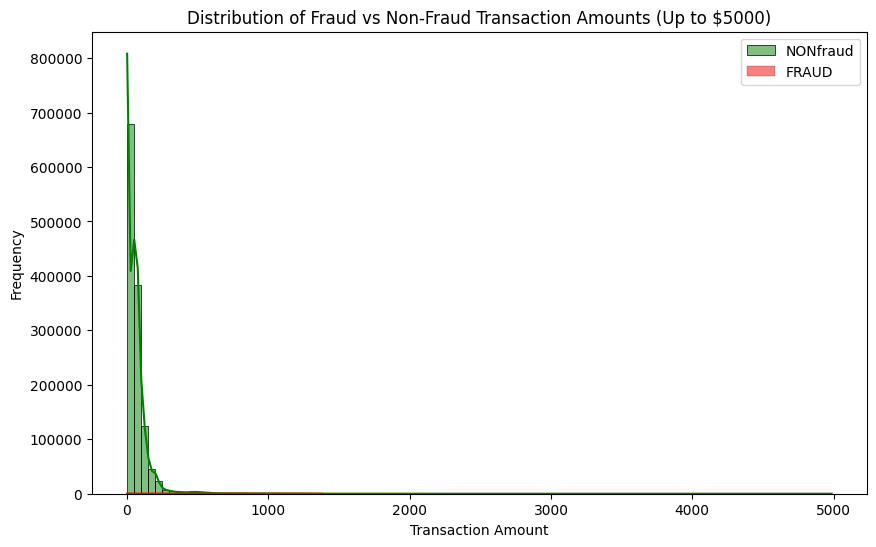

In [44]:

plt.figure(figsize=(10, 6))

# Plot the histogram for non-fraudulent transactions with transaction amounts less than $5000
# Filters the DataFrame for non-fraudulent transactions (is_fraud == 0) and transaction amount less than $5000
# Plots the 'amt' column with 50 bins and uses green color for the bars
# Adds a label 'NONfraud' for the legend and enables KDE to see the probability density
sns.histplot(df[(df['is_fraud'] == 0) & (df['amt'] < 5000)]['amt'], bins=100, color='green', label='NONfraud', kde=True)

# Plot the histogram for fraudulent transactions with transaction amounts less than $5000
# Filters the DataFrame for fraudulent transactions (is_fraud == 1) and transaction amount less than $5000
# Plots the 'amt' column with 50 bins and uses red color for the bars
# Adds a label 'FRAUD' for the legend and enables KDE to see the probability density
sns.histplot(df[(df['is_fraud'] == 1) & (df['amt'] < 5000)]['amt'], bins=100, color='red', label='FRAUD', kde=True)

plt.legend()
plt.title('Distribution of Fraud vs Non-Fraud Transaction Amounts (Up to $5000)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


##### Non-Fraudulent Transactions:
##### Peak at Low Amounts: Most non-fraudulent transactions happen at very low amounts. This is shown by the high spike at the beginning of the green bars.
##### Few High Amounts: While the majority of transactions are small, there are a small number of non-fraudulent transactions that involve larger amounts, as indicated by the green bars that gradually decrease but stretch towards $5000.
##### Fraudulent Transactions:
##### Less Visible: Fraudulent transactions (in red) are much less common than non-fraudulent ones, which makes them harder to see on the graph.
##### Similar Pattern: Like non-fraudulent transactions, fraudulent transactions are also more frequent at lower amounts and become less common as the amount increases.


### Merchant category between fraudulent and non fraudulent

<function matplotlib.pyplot.show(close=None, block=None)>

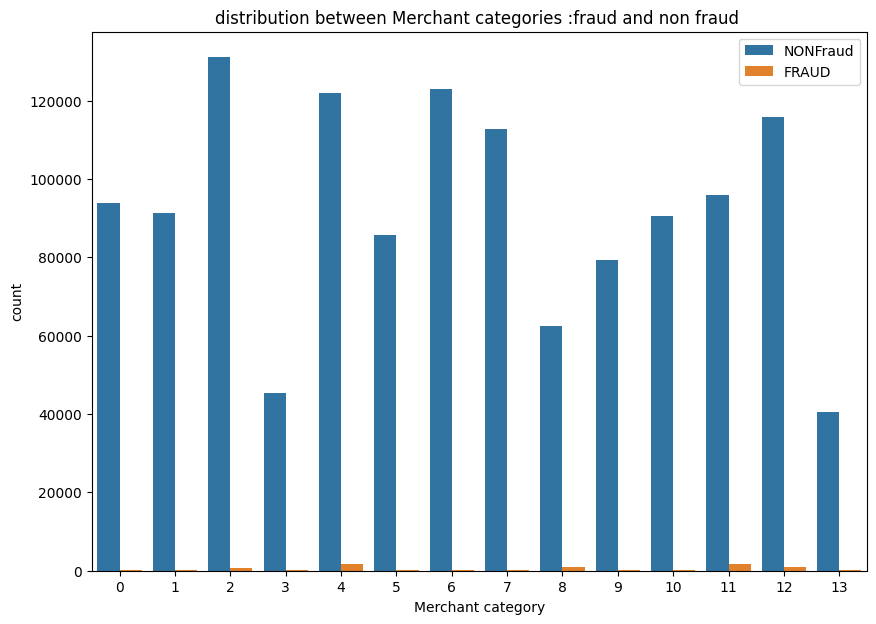

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(x='category',hue='is_fraud',data=df)
plt.title('distribution between Merchant categories :fraud and non fraud ')
plt.xlabel('Merchant category')
plt.ylabel('count')
plt.legend(['NONFraud','FRAUD'])
plt.show

#### Are there any specific patterns in the time of transactions that are indicative of fraud?

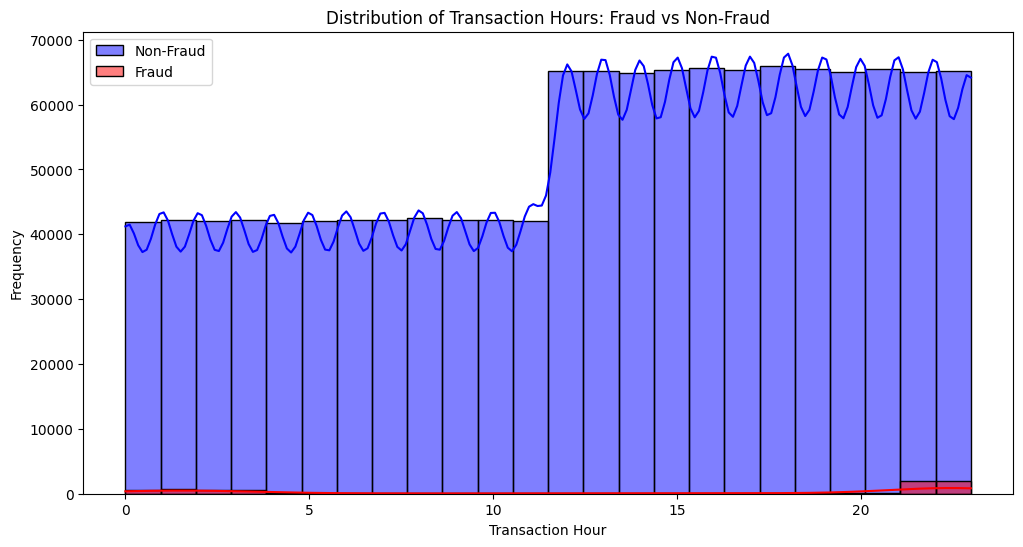

In [52]:
# Analysis: Compare the distribution of transaction time (hour) between fraud and non-fraud cases
plt.figure(figsize=(12, 6))
sns.histplot(df[df['is_fraud'] == 0]['trans_hour'], bins=24, kde=True, color='blue', label='Non-Fraud')
sns.histplot(df[df['is_fraud'] == 1]['trans_hour'], bins=24, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Distribution of Transaction Hours: Fraud vs Non-Fraud')
plt.xlabel('Transaction Hour')
plt.ylabel('Frequency')
plt.show()


#### Visualization of gender vs fraud (0:F,1:M)

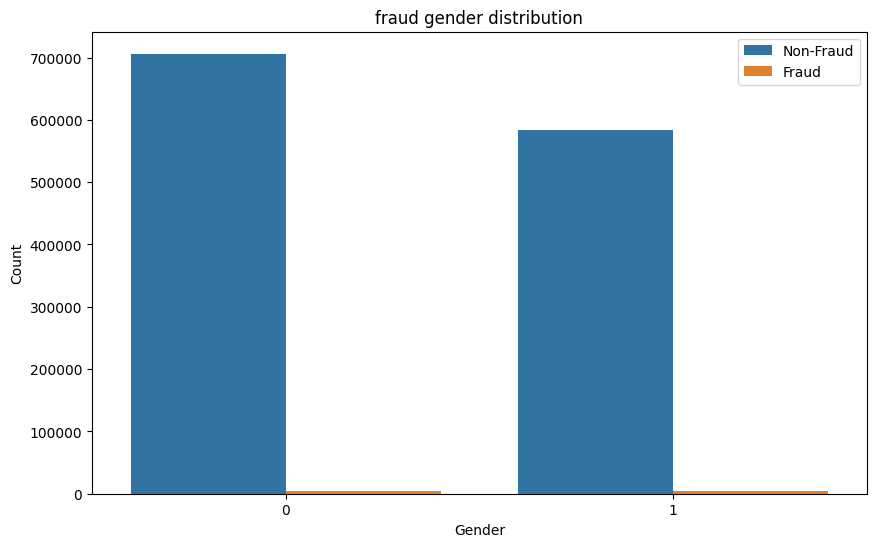

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'gender', hue='is_fraud',data= df)
plt.title('fraud gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

#### Are there any specific patterns in the gender, amount or time  of fraud transactions, ie are there any underlying relationships to further explore?

In [55]:
# Filter out only the fraudulent transactions
fraud_df = df.loc[df['is_fraud'] == 1, ['amt', 'gender', 'trans_hour']].copy()
fraud_df


,amt,gender,trans_hour
2449,281.06,1,1
2472,11.52,0,1
2523,276.31,0,3
2546,7.03,1,3
2553,275.73,0,3
...,...,...,...
1295399,977.01,0,1
1295491,1210.91,0,1
1295532,10.24,1,2
1295666,21.69,0,3


In [57]:
# Calculate average transaction amount by gender for fraudulent transactions
avg_amount_by_gender = fraud_df.groupby('gender')['amt'].mean()
avg_amount_by_gender


gender
0    494.052835
1    568.231575
Name: amt, dtype: float64

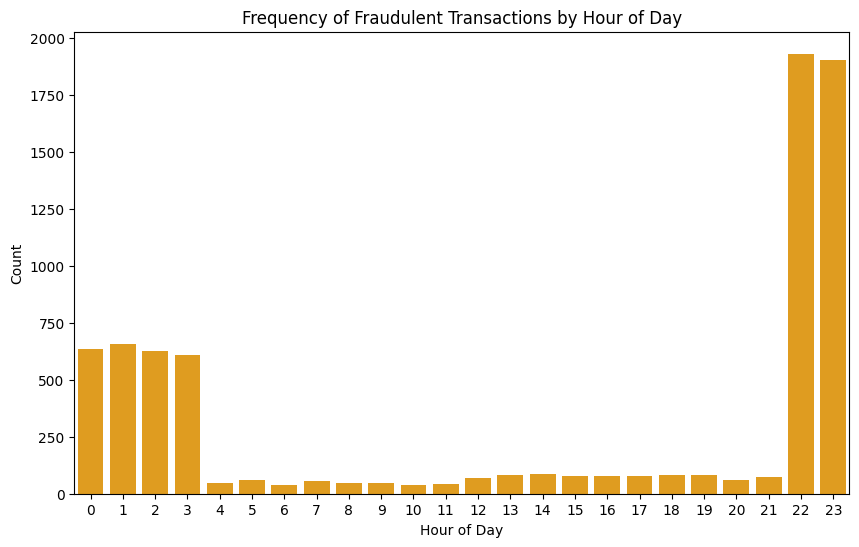

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', data=fraud_df, color='orange')
plt.title('Frequency of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

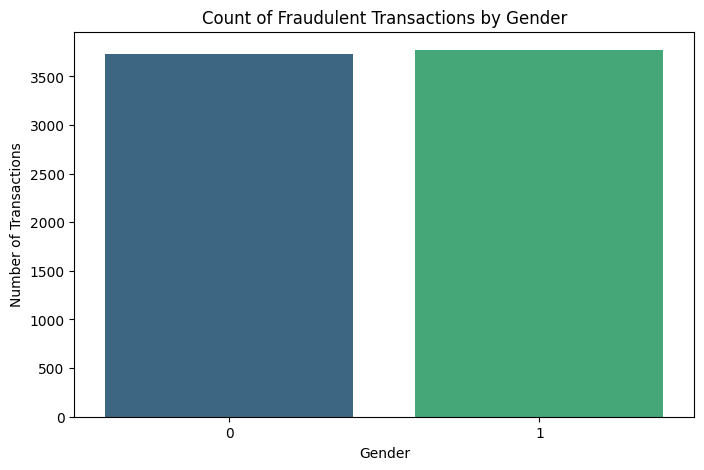

In [61]:
# Bar chart for the count of fraudulent transactions by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=fraud_df, palette='viridis')
plt.title('Count of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

The height of each bar represents the number of fraudulent transactions associated with each gender. Both bars seem fairly similar in height, suggesting that the occurrence of fraudulent transactions is relatively balanced between the two gender categories.


#### Are there any specific patterns in the age of fraud transactions?

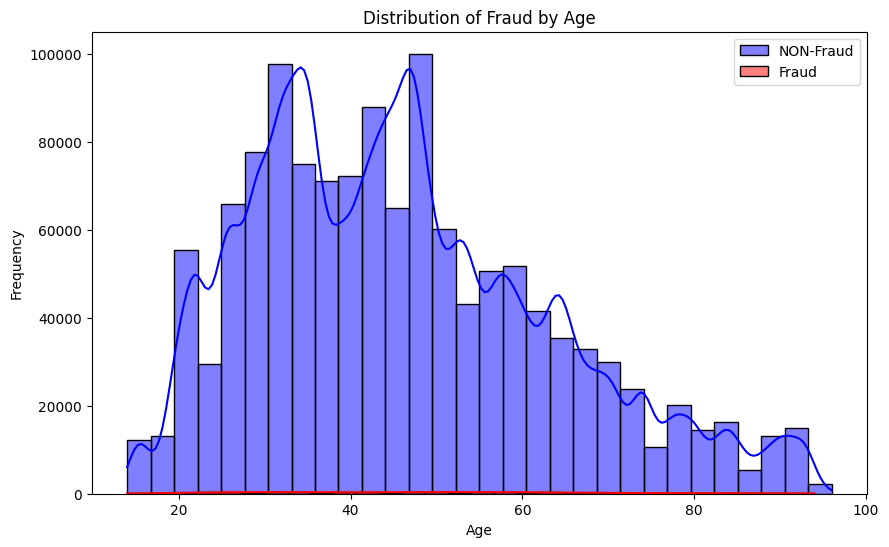

In [63]:
#  age vs fraud
plt.figure(figsize=(10, 6))
sns.histplot(df[df['is_fraud'] == 0]['age'], bins=30, kde=True, color='blue', label='NON-Fraud')
sns.histplot(df[df['is_fraud'] == 1]['age'], bins=30, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Distribution of Fraud by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Further statistical testing

In [64]:
from scipy.stats import chi2_contingency

# Gender vs Fraud
gender_table = pd.crosstab(df['gender'], df['is_fraud'])
chi2, p, dof, expected = chi2_contingency(gender_table)
print(f"Chi-square test for gender vs fraud: chi2={chi2}, p-value={p}")

Chi-square test for gender vs fraud: chi2=75.51456622055794, p-value=3.627211385830374e-18


#### There is a statistically significant association between gender and fraud occurrence. This implies that the frequency of fraudulent transactions is not evenly distributed between genders based on what would be expected if gender had no effect.


### to see if theres a relationship between gender,fraud and time of the day

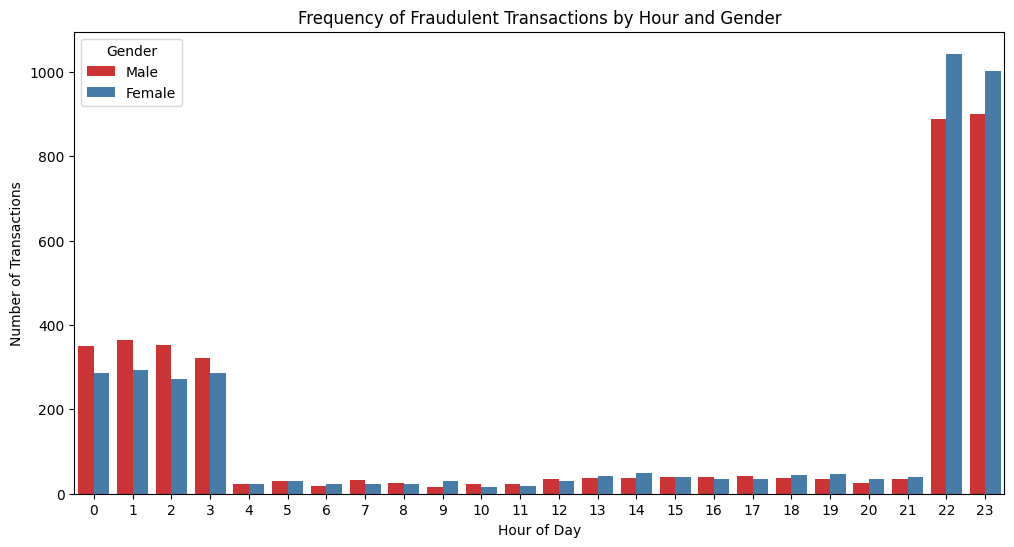

In [67]:
gender_labels = {0: 'Male', 1: 'Female'}
plt.figure(figsize=(12, 6))
sns.countplot(x='trans_hour', hue='gender', data=fraud_df, palette='Set1')
plt.title('Frequency of Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Gender', labels=[gender_labels[k] for k in sorted(gender_labels.keys())])
plt.show()


In [69]:
import scipy.stats as stats
male_amounts = df[df['gender'] == 0]['amt']
female_amounts = df[df['gender'] == 1]['amt']

# T-test for independent samples
t_stat, p_value = stats.ttest_ind(male_amounts, female_amounts)
print("T-test result: T-stat =", t_stat, ", P-value =", p_value)


T-test result: T-stat = -1.1773938196897045 , P-value = 0.23903857160933223


## EDA Conclusions
#### Fraud Timing: Both genders tend to engage more in fraudulent activities during the late evening hours, suggesting that fraud detection systems might benefit from increased vigilance during these times.
#### Impact of Gender on Fraud Amount: The T-test indicates that there isn't a statistically significant difference in the average transaction amounts for fraud between genders, meaning that while the counts of fraud by time and the slight variations in peak times may vary between genders, the amount of money involved does not differ significantly between male and female perpetrators based on the data analyzed.


## 2)Model Building and Evaluation

### Optimal Machine Learning Algorithms for Fraud Detection

This section explores which machine learning algorithms are most effective at identifying fraudulent transactions within this dataset. We will evaluate and compare several algorithms:

- **Logistic Regression**: A foundational model for binary classification tasks.
- **Random Forest**: An ensemble method that uses multiple decision trees to improve classification accuracy.
- **Gradient Boosting**: Another ensemble technique that builds on weak learners in a sequential manner to enhance prediction accuracy.
- **Neural Networks**: Complex models capable of capturing non-linear relationships through layers of neurons.

### Evaluation Metrics for Model Performance

To assess the performance of each model, we will utilize various evaluation metrics:

- **Accuracy**: Measures the overall correctness of the model.
- **Precision**: Indicates the proportion of positive identifications that were actually correct.
- **Recall (Sensitivity)**: Reflects the ability of the model to find all relevant cases (all actual frauds).
- **F1-Score**: Harmonic mean of precision and recall, providing a balance between them.
- **ROC-AUC**: Area Under the Receiver Operating Characteristic Curve, a comprehensive indicator of model performance across all classification thresholds.

### Selecting the Appropriate Metric

We will determine the most appropriate metric for evaluating fraud detection models in this context. Given the typically imbalanced nature of fraud data, where fraudulent transactions are much rarer than legitimate ones, metrics like precision, recall, F1-score, and ROC-AUC are often more informative than accuracy alone.


In [72]:
#test-train split]
X=df.drop(columns=['is_fraud'])
y=df['is_fraud']

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state= 42)

In [73]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Initialize models
from sklearn.linear_model import LogisticRegression
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=300)
}

In [76]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    if y_prob is not None:
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}\n")
    else:
        print("ROC-AUC Score: Not applicable (model does not support probability estimates)\n")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

ROC-AUC Score: 0.8405454288417745

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.79      0.83      0.81      1520

    accuracy                           1.00    259335
   macro avg       0.90      0.91      0.90    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.9128429695609969

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.97      0.74      0.84      1

## 3) Model Evaluation for Fraud Detection

This section provides a detailed evaluation of various machine learning models applied to the detection of fraudulent transactions within our dataset. The performance of each model has been assessed using multiple metrics, including precision, recall, F1-score, and ROC-AUC scores, particularly focusing on their ability to correctly identify fraudulent transactions.

### Logistic Regression
- **Precision for Fraud (Class 1):** 0.00
- **Recall for Fraud (Class 1):** 0.00
- **F1-Score for Fraud (Class 1):** 0.00
- **ROC-AUC Score:** 0.840
- **Analysis:** Logistic Regression shows very limited capability in detecting fraud, with zero precision and recall for the fraudulent class. Its overall ability to distinguish between fraudulent and legitimate transactions is low, as reflected by the ROC-AUC score.

### Decision Tree
- **Precision for Fraud (Class 1):** 0.79
- **Recall for Fraud (Class 1):** 0.83
- **F1-Score for Fraud (Class 1):** 0.81
- **ROC-AUC Score:** 0.913
- **Analysis:** The Decision Tree model demonstrates robust performance with high precision and recall. It effectively identifies fraudulent transactions, and its ROC-AUC score indicates a strong discriminative ability compared to Logistic Regression.

### Random Forest
- **Precision for Fraud (Class 1):** 0.97
- **Recall for Fraud (Class 1):** 0.74
- **F1-Score for Fraud (Class 1):** 0.84
- **ROC-AUC Score:** 0.990
- **Analysis:** Random Forest excels in fraud detection, offering the highest precision among the models evaluated. It has a very good F1-score and the best ROC-AUC score, showcasing its excellent overall performance in distinguishing fraudulent transactions.

### Gradient Boosting
- **Precision for Fraud (Class 1):** 0.80
- **Recall for Fraud (Class 1):** 0.63
- **F1-Score for Fraud (Class 1):** 0.70
- **ROC-AUC Score:** 0.971
- **Analysis:** Gradient Boosting performs well, although its recall is lower than that of the Decision Tree and Random Forest. Despite this, it maintains a high ROC-AUC score, indicating good model performance overall.

### Neural Network
- **Precision for Fraud (Class 1):** 0.93
- **Recall for Fraud (Class 1):** 0.69
- **F1-Score for Fraud (Class 1):** 0.79
- **ROC-AUC Score:** 0.989
- **Analysis:** The Neural Network provides very high precision and good recall. Its performance is competitive with the Random Forest, as evidenced by a similarly high ROC-AUC score, making it highly effective at fraud detection.

### Recommended Model
Based on the evaluation metrics, **Random Forest** emerges as the most effective model for detecting fraudulent transactions in this dataset, with the Neural Network also showing similar strengths. Both models exhibit high precision and excellent ROC-AUC scores, suggesting they are highly capable of distinguishing between fraudulent and legitimate transactions.

